

## Task Description


1. Explore the data and create training/test splits for your experiments

2. Build a LogisticRegression classifier and design some relevant features to apply it to your data

3. Conduct hyperparameter tuning to find the optimal hyperparameters for your model

4. Explore your model's predictions and conduct an error analysis to see where the model fails

5. Conduct an ablation study using a subset of languages


Throughout the notebook, there are questions that you should address in your report. These are marked with 🗒❓.

☝ Note, these questions are intended to provide you with an opportunity to reflect on what it is that you are doing and the kind of challenges you might face along the way.




In [ ]:
import pandas as pd
import numpy as np

# set seed for reproducibility
np.random.seed(42)

### Loading the datasets

In [ ]:
# download dataset
!gdown 1QP6YuwdKFNUPpvhOaAcvv2Pcp4JMbIRs # x_train
!gdown 1QVo7PZAdiZKzifK8kwhEr_umosiDCUx6 # x_test
!gdown 1QbBeKcmG2ZyAEFB3AKGTgSWQ1YEMn2jl # y_train
!gdown 1QaZj6bI7_78ymnN8IpSk4gVvg-C9fA6X # y_test

Downloading...
From: https://drive.google.com/uc?id=1QP6YuwdKFNUPpvhOaAcvv2Pcp4JMbIRs
To: /content/x_train.txt
100% 64.1M/64.1M [00:04<00:00, 15.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QVo7PZAdiZKzifK8kwhEr_umosiDCUx6
To: /content/x_test.txt
100% 65.2M/65.2M [00:00<00:00, 205MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QbBeKcmG2ZyAEFB3AKGTgSWQ1YEMn2jl
To: /content/y_train.txt
100% 480k/480k [00:00<00:00, 53.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QaZj6bI7_78ymnN8IpSk4gVvg-C9fA6X
To: /content/y_test.txt
100% 480k/480k [00:00<00:00, 107MB/s]


In [ ]:
with open(f'x_train.txt') as f:
    x_train = f.read().splitlines()
with open(f'y_train.txt') as f:
    y_train = f.read().splitlines()
with open(f'x_test.txt') as f:
    x_test = f.read().splitlines()
with open(f'y_test.txt') as f:
    y_test = f.read().splitlines()

In [ ]:
# Combine x_train and y_train into one dataframe
train_df = pd.DataFrame({'text': x_train, 'label': y_train})
# Write train_df to csv with tab as separator
train_df.to_csv('train_df.csv', index=False, sep='\t')
# Comibne x_test and y_test into one dataframe
test_df = pd.DataFrame({'text': x_test, 'label': y_test})
# Inspect the first 5 items in the train split
train_df.head()

,text,label
0,Klement Gottwaldi surnukeha palsameeriti ning ...,est
1,"Sebes, Joseph; Pereira Thomas (1961) (på eng)....",swe
2,भारतीय स्वातन्त्र्य आन्दोलन राष्ट्रीय एवम क्षे...,mai
3,"Après lo cort periòde d'establiment a Basilèa,...",oci
4,ถนนเจริญกรุง (อักษรโรมัน: Thanon Charoen Krung...,tha


In [ ]:
# Get list of all labels
labels = train_df['label'].unique().tolist()
print(labels)

['est', 'swe', 'mai', 'oci', 'tha', 'orm', 'lim', 'guj', 'pnb', 'zea', 'krc', 'hat', 'pcd', 'tam', 'vie', 'pan', 'szl', 'ckb', 'fur', 'wuu', 'arz', 'ton', 'eus', 'map-bms', 'glk', 'nld', 'bod', 'jpn', 'arg', 'srd', 'ext', 'sin', 'kur', 'che', 'tuk', 'pag', 'tur', 'als', 'koi', 'lat', 'urd', 'tat', 'bxr', 'ind', 'kir', 'zh-yue', 'dan', 'por', 'fra', 'ori', 'nob', 'jbo', 'kok', 'amh', 'khm', 'hbs', 'slv', 'bos', 'tet', 'zho', 'kor', 'sah', 'rup', 'ast', 'wol', 'bul', 'gla', 'msa', 'crh', 'lug', 'sun', 'bre', 'mon', 'nep', 'ibo', 'cdo', 'asm', 'grn', 'hin', 'mar', 'lin', 'ile', 'lmo', 'mya', 'ilo', 'csb', 'tyv', 'gle', 'nan', 'jam', 'scn', 'be-tarask', 'diq', 'cor', 'fao', 'mlg', 'yid', 'sme', 'spa', 'kbd', 'udm', 'isl', 'ksh', 'san', 'aze', 'nap', 'dsb', 'pam', 'cym', 'srp', 'stq', 'tel', 'swa', 'vls', 'mzn', 'bel', 'lad', 'ina', 'ava', 'lao', 'min', 'ita', 'nds-nl', 'oss', 'kab', 'pus', 'fin', 'snd', 'kaa', 'fas', 'cbk', 'cat', 'nci', 'mhr', 'roa-tara', 'frp', 'ron', 'new', 'bar', 'ltg'


### 1.1 Exploring the training data

🗒❓Take a look at a couple of texts from different languages and answer the following questions:

1. Do you notice anything that might be challenging for the classification?
2. How is the data distributed? (i.e., how many instances per label are there in the training and test set? Is it a balanced dataset?)
3. Do you think the train/test split is appropriate (i.e., is the test data representative of the training data)? If not, please rearrange the data in a more appropriate way.


In [ ]:
print(train_df['label'].value_counts())
print(test_df['label'].value_counts())

label
est    500
eng    500
vep    500
sgs    500
uig    500
      ... 
lmo    500
mya    500
ilo    500
csb    500
ltz    500
Name: count, Length: 235, dtype: int64
label
mwl    500
uig    500
tat    500
nno    500
new    500
      ... 
frp    500
krc    500
mlg    500
msa    500
ckb    500
Name: count, Length: 235, dtype: int64


In [ ]:
# overlap between test and train
# print(len(set(train_df['text'].unique()).intersection(set(test_df['text'].unique()))))

### 1.2 Data preparation

Get a subset of the train/test data that includes 20 languages.
Include English, German, Dutch, Danish, Swedish, Norwegian, and Japanese, plus 13 additional languages of your choice based on the items in the list of labels.

In [ ]:
# Create your train/test subsets of languages
given_labels = set(['eng', 'deu', 'nld', 'dan', 'swe', 'nno', 'jpn'])

# Randomly sample 20 different target labels and create subsets of train and test dataframes with only those labels
all_labels = set(train_df['label'].unique())
target_labels = list(np.random.choice(list(all_labels - given_labels), 13, replace=False))
target_labels += given_labels
print(len(target_labels))
print(target_labels)
train_df = train_df[train_df['label'].isin(target_labels)]
test_df = test_df[test_df['label'].isin(target_labels)]

20
['cbk', 'ceb', 'ben', 'kur', 'szl', 'hsb', 'crh', 'srn', 'stq', 'mlg', 'pag', 'lav', 'lao', 'jpn', 'nno', 'deu', 'nld', 'swe', 'dan', 'eng']


In [ ]:
print(train_df['label'].value_counts())
print(test_df['label'].value_counts())
print(len(set(train_df['text'].unique()).intersection(set(test_df['text'].unique()))))

label
swe    500
szl    500
deu    500
nno    500
srn    500
hsb    500
ben    500
eng    500
lav    500
cbk    500
lao    500
stq    500
mlg    500
crh    500
dan    500
pag    500
kur    500
jpn    500
nld    500
ceb    500
Name: count, dtype: int64
label
nld    500
jpn    500
szl    500
deu    500
dan    500
swe    500
srn    500
crh    500
hsb    500
cbk    500
nno    500
lav    500
mlg    500
ben    500
lao    500
eng    500
pag    500
kur    500
stq    500
ceb    500
Name: count, dtype: int64
22


In [ ]:
x_train, y_train = train_df['text'].to_numpy(), train_df['label'].to_numpy()
x_test, y_test = test_df['text'].to_numpy(), test_df['label'].to_numpy()
print(x_train[:5])
print(y_train[:5])

['Sebes, Joseph; Pereira Thomas (1961) (på eng). The Jesuits and the Sino-Russian treaty of Nerchinsk (1689): the diary of Thomas Pereira. Bibliotheca Instituti historici S. I., 99-0105377-3 ; 18. Rome. Libris 677492'
 'Wjelganocno Wyspa (szpań. Isla de Pascua, Territorio Especial de Isla de Pascua, polinez. Rapa Nui, ang. Easter Island)- wyspa na Pokojnym Uoceańe, we uůnygo połedńowyj tajli. Przinoleży do Czile, do regijůńu Valparaíso. Mo 163,6 km² wjyrchu a podug danych ze 2011 roku půmjyszkiwało sam 5035 ludźůw. Jedźino mjejscowość na wyspje to Hanga Roa. Je rozlygowano 3600 km na zachůd uod brzygu Czile a 2078 km uod nojbliższygo inkszygo půmjyszkiwanygo lůndu - wyspy Pitcairn. 70% mjyszkańcůw sam to Polinezyjczyki.'
 'De spons behoort tot het geslacht Haliclona en behoort tot de familie Chalinidae. De wetenschappelijke naam van de soort werd voor het eerst geldig gepubliceerd in 1910 door Kudelin.'
 'エノが行きがかりでバスに乗ってしまい、気分が悪くなった際に助けるが、今すぐバスを降りたいと運転手に頼む際、本当のことを言ってしまうと彼女が恥ずかしい思いをすると察

In [ ]:
# # TODO: With the following code, we wanted to ENCODE the labels, however, our cat was walking on the keyboard and some of it got changed. Can you fix it?
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder().fit(y_train)
# y_train, y_test = label_encoder.fit(y_train), label_encoder.fit(y_test)
# print(label_encoder.classes_)
# print(y_train)
# print(y_test)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder().fit(y_train)
y_train, y_test = label_encoder.transform(y_train), label_encoder.transform(y_test)
print(label_encoder.classes_)
print(y_train)
print(y_test)

['ben' 'cbk' 'ceb' 'crh' 'dan' 'deu' 'eng' 'hsb' 'jpn' 'kur' 'lao' 'lav'
 'mlg' 'nld' 'nno' 'pag' 'srn' 'stq' 'swe' 'szl']
[18 19 13 ...  2  6  4]
[13  8 17 ...  0 17  4]


### 2.1 Build a LogisticRegression classifier

To start with, we're going to build a very simple LogisticRegression classifier.
Use a `Pipeline` to chain togther a `CountVectorizer` and a `LogisticRegression` estimator. Then perform a 5-fold cross validation and report the scores of this model as a baseline.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Define a very basic pipeline for our preprocessing and LogisticRegression classifier
pipe = Pipeline(steps=[
        ('vect', CountVectorizer()),
        ('clf', LogisticRegression())
    ], verbose=True)

# Run a cross validation to inspect the model's expected performance
scores = cross_val_score(pipe, x_train, y_train, scoring='accuracy', cv=2)
print(scores)
print(np.mean(scores))


[Pipeline] .............. (step 1 of 2) Processing vect, total=   0.6s
[Pipeline] ............... (step 2 of 2) Processing clf, total=  12.5s
[Pipeline] .............. (step 1 of 2) Processing vect, total=   0.5s
[Pipeline] ............... (step 2 of 2) Processing clf, total=  11.5s
[0.9524 0.9592]
0.9558


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a very basic pipeline for our preprocessing and LogisticRegression classifier
pipe = Pipeline(steps=[
        ('vect', CountVectorizer()),
        ('clf', LogisticRegression())
    ], verbose=True)


clf_param_grid = {
    'clf__penalty': ['l2', 'l1'],
    'clf__solver': ['liblinear', 'saga'],
    # 'vect__analyzer': ['word', 'char_wb'],
    }

grid = GridSearchCV(pipe, param_grid=clf_param_grid, scoring='accuracy', cv=2, verbose=3)
grid.fit(x_train, y_train)
grid_results = pd.DataFrame.from_dict(grid.cv_results_)
grid_results.sort_values(by=["rank_test_score"], inplace=True)
grid_results.head()

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[Pipeline] .............. (step 1 of 2) Processing vect, total=   0.5s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   3.2s
[CV 1/2] END clf__penalty=l2, clf__solver=liblinear;, score=0.963 total time=   4.1s
[Pipeline] .............. (step 1 of 2) Processing vect, total=   0.5s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   5.3s
[CV 2/2] END clf__penalty=l2, clf__solver=liblinear;, score=0.967 total time=   6.4s
[Pipeline] .............. (step 1 of 2) Processing vect, total=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[Pipeline] ............... (step 2 of 2) Processing clf, total=   4.6s
[CV 1/2] END .clf__penalty=l2, clf__solver=saga;, score=0.966 total time=   5.8s
[Pipeline] .............. (step 1 of 2) Processing vect, total=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[Pipeline] ............... (step 2 of 2) Processing clf, total=   4.4s
[CV 2/2] END .clf__penalty=l2, clf__solver=saga;, score=0.971 total time=   5.2s
[Pipeline] .............. (step 1 of 2) Processing vect, total=   0.5s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   2.3s
[CV 1/2] END clf__penalty=l1, clf__solver=liblinear;, score=0.949 total time=   3.2s
[Pipeline] .............. (step 1 of 2) Processing vect, total=   0.9s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   2.0s
[CV 2/2] END clf__penalty=l1, clf__solver=liblinear;, score=0.956 total time=   3.1s
[Pipeline] .............. (step 1 of 2) Processing vect, total=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[Pipeline] ............... (step 2 of 2) Processing clf, total=  42.1s
[CV 1/2] END .clf__penalty=l1, clf__solver=saga;, score=0.962 total time=  42.9s
[Pipeline] .............. (step 1 of 2) Processing vect, total=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[Pipeline] ............... (step 2 of 2) Processing clf, total=  35.2s
[CV 2/2] END .clf__penalty=l1, clf__solver=saga;, score=0.967 total time=  36.0s
[Pipeline] .............. (step 1 of 2) Processing vect, total=   1.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=  11.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__penalty,param_clf__solver,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
1,5.215374,0.292390,0.304427,0.000617,l2,saga,"{'clf__penalty': 'l2', 'clf__solver': 'saga'}",0.9656,0.9712,0.9684,0.0028,1
0,4.768745,1.040460,0.440473,0.104963,l2,liblinear,"{'clf__penalty': 'l2', 'clf__solver': 'libline...",0.9634,0.9674,0.9654,0.0020,2
3,39.178858,3.464462,0.303042,0.000513,l1,saga,"{'clf__penalty': 'l1', 'clf__solver': 'saga'}",0.9618,0.9674,0.9646,0.0028,3
2,2.801485,0.040850,0.382919,0.102673,l1,liblinear,"{'clf__penalty': 'l1', 'clf__solver': 'libline...",0.9488,0.9560,0.9524,0.0036,4



### 2.2 Feature Engineering

So far, we've only considered the basic `CountVectorizer` at the word level to encode our input texts for our model.

Your task is to apply some text preprocessing and engineer some more informative features.

To do this, think about what other features might be relevant for determining the language of an input text.

Define a custom set of feature extractors and implement the necessary preprocessing steps to extract these features from strings.

Then initialise a processing pipeline that converts your input data into features that the model can take as input.

☝ Note, this step can be as involved as your heart desires, there is only one minimal requirement: you must use something more than the base `CountVectorizer`. We recommend that you take a look at the [`BaseEstimator`](https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html) and [`TransformerMixin`](https://scikit-learn.org/stable/modules/generated/sklearn.base.TransformerMixin.html#transformermixin) classes from `sk-learn`, as these can be helpful for defining custom transformers.


In [ ]:
import string
import re
from scipy import sparse
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer

class TextNormalizer(BaseEstimator, TransformerMixin):
    """
    Custom text normalizer.
    """
    def fit(self, X, y=None):
        return self

    def _normalize_text(self, text):
        text = text.translate(str.maketrans('', '', string.punctuation))
        text = re.sub(r'\s+', ' ', text)
        text = re.sub(r'\d+', r'NUM', text)
        text = re.sub(r'\n', r'', text)
        return text

    def transform(self, X, y=None):
        return np.array([self._normalize_text(text) for text in X])

In [ ]:
# Initialise a pipe with our new TextNormalizer() and TfidfVectorizer() with informed hyperparameters
pipe = Pipeline([
    ('normalizer', TextNormalizer()),
    ('vectorizer', TfidfVectorizer(lowercase=False, analyzer='char_wb', ngram_range=(3,6), max_features=1000, smooth_idf=True)),
    ('clf', LogisticRegression())
])

scores = cross_val_score(pipe, x_train, y_train, scoring='accuracy', cv=2)
print(scores)
print(scores.mean())

[0.963  0.9664]
0.9647


In [ ]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('normalizer', TextNormalizer()),
                ('vectorizer',
                 TfidfVectorizer(analyzer='char_wb', lowercase=False,
                                 max_features=1000, ngram_range=(3, 6))),
                ('clf', LogisticRegression())])

### 3.1 Grid Search

Use sklearn's GridSearchCV and experiment with the following hyperparameters:
1. Penalty (Regularization)
2. Solver
3. Experiment with parameters of the Vectorizer (optional, but highly advised)

☝ Note, don't overdo it at the beginning, since runtime might go up fast!

Make sure you read through the [docs](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html#logisticregression) to get an understanding of what these parameters do.


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define GridSearch param space
clf_param_grid = {
    'clf__penalty': ['l2', 'l1'],
    'clf__solver': ['liblinear', 'saga'],
    }

grid = GridSearchCV(pipe, n_jobs=1, param_grid=clf_param_grid, scoring='accuracy', cv=2, verbose=3)
grid.fit(x_train, y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2] END clf__penalty=l2, clf__solver=liblinear;, score=0.961 total time=  14.8s
[CV 2/2] END clf__penalty=l2, clf__solver=liblinear;, score=0.962 total time=  14.6s
[CV 1/2] END .clf__penalty=l2, clf__solver=saga;, score=0.963 total time=  16.5s
[CV 2/2] END .clf__penalty=l2, clf__solver=saga;, score=0.966 total time=  16.4s
[CV 1/2] END clf__penalty=l1, clf__solver=liblinear;, score=0.950 total time=  14.9s
[CV 2/2] END clf__penalty=l1, clf__solver=liblinear;, score=0.957 total time=  15.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END .clf__penalty=l1, clf__solver=saga;, score=0.950 total time=  22.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END .clf__penalty=l1, clf__solver=saga;, score=0.955 total time=  21.3s


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('normalizer', TextNormalizer()),
                                       ('vectorizer',
                                        TfidfVectorizer(analyzer='char_wb',
                                                        lowercase=False,
                                                        max_features=1000,
                                                        ngram_range=(3, 6))),
                                       ('clf', LogisticRegression())]),
             n_jobs=1,
             param_grid={'clf__penalty': ['l2', 'l1'],
                         'clf__solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=3)

### 3.2 Best Model Selection

After conducting our Grid Search, we should be able to identify our best model by inspecting the using the Grid Search result attribute `cv_results_`. (Hint: `cv_results_` returns a dictionay, so convert it to a Pandas Dataframe for easy inspection.)

🗒❓ What were the hyperparameter combinations for your best-performing model on the test set.

🗒❓ What is the advantage of grid search cross-validation?


In [ ]:
grid_results = pd.DataFrame.from_dict(grid.cv_results_)
grid_results.sort_values(by=["rank_test_score"])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__penalty,param_clf__solver,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
1,12.579343,0.021115,3.854150,0.015515,l2,saga,"{'clf__penalty': 'l2', 'clf__solver': 'saga'}",0.9630,0.9662,0.9646,0.0016,1
0,10.881666,0.007172,3.807179,0.068787,l2,liblinear,"{'clf__penalty': 'l2', 'clf__solver': 'libline...",0.9608,0.9622,0.9615,0.0007,2
2,10.646060,0.009595,4.356290,0.099741,l1,liblinear,"{'clf__penalty': 'l1', 'clf__solver': 'libline...",0.9504,0.9570,0.9537,0.0033,3
3,17.394328,0.857793,4.315911,0.409106,l1,saga,"{'clf__penalty': 'l1', 'clf__solver': 'saga'}",0.9504,0.9548,0.9526,0.0022,4


In [ ]:
# Extract best model form our grid search
best_model = grid.best_estimator_
best_model

Pipeline(steps=[('normalizer', TextNormalizer()),
                ('vectorizer',
                 TfidfVectorizer(analyzer='char_wb', lowercase=False,
                                 max_features=1000, ngram_range=(3, 6))),
                ('clf', LogisticRegression(solver='saga'))])

In [ ]:
# Fit the best model on all available training data
best_model.fit(x_train, y_train)

Pipeline(steps=[('normalizer', TextNormalizer()),
                ('vectorizer',
                 TfidfVectorizer(analyzer='char_wb', lowercase=False,
                                 max_features=1000, ngram_range=(3, 6))),
                ('clf', LogisticRegression(solver='saga'))])

## 3.3 Model Evaluation

Once you have identified your best model, use it to predict the languages of texts in the test split.

🗒❓ According to standard metrics (e.g. Accurracy, Precision, Recall and F1), how well does your model perform on the heldout test set?


In [ ]:
# Get model predictions on the test set
y_pred = best_model.predict(x_test)
print(y_pred)

[13  8  5 ...  0 17  4]


In [ ]:
# Evaluate model's predictions
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

print(f'Acc: {accuracy_score(y_test, y_pred):.3f}\n')

# Classification Report (per class metrics)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_, digits=3))

Acc: 0.967


Classification Report:

              precision    recall  f1-score   support

         ben      0.993     0.892     0.940       500
         cbk      0.982     0.896     0.937       500
         ceb      0.988     1.000     0.994       500
         crh      0.994     0.990     0.992       500
         dan      0.982     0.972     0.977       500
         deu      0.916     0.984     0.949       500
         eng      0.769     0.980     0.862       500
         hsb      0.992     0.966     0.979       500
         jpn      0.911     0.984     0.946       500
         kur      0.996     0.988     0.992       500
         lao      0.945     0.934     0.940       500
         lav      0.996     0.978     0.987       500
         mlg      1.000     0.998     0.999       500
         nld      0.982     0.982     0.982       500
         nno      0.992     0.982     0.987       500
         pag      0.998     0.918     0.956       500
         srn      1.000     0.974     0.987 

### 4.1 Error Analysis

Inspect your model's predictions using a confusion matrix and provide a summary of what you find in your report.

🗒❓ Where does your model do well and where does it fail?

🗒❓ What are some possible reasons for why it fails in these cases?


Confusion Matrix:



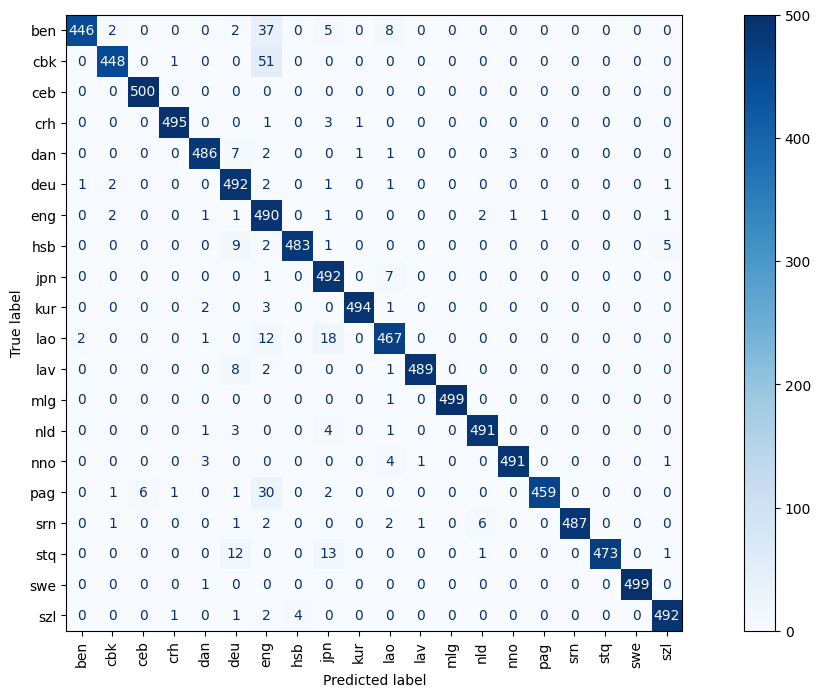

In [ ]:
# Confusion Matrix
print("\nConfusion Matrix:\n")
cm = confusion_matrix(y_test, y_pred)

# # show confusion matrix in a simple numerical representation:
# print(cm)

# or for more visual rep, plot it as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', xticks_rotation=90)
fig = disp.figure_
fig.set_figwidth(16)
fig.set_figheight(8)

---

### 5.1 Interpretability Analysis

Now that you have your best model, it's time to dive deep into understanding how the model makes predictions.

It is important that we can explain and visualise our models to improve task performance. Explainable models help characterise model fairness, transparency, and outcomes.

Let's try to understand what our best-performing logistic regression classification model has learned.

Inspect the 20 most important features for the languages English, Swedish, Norwegian, and Japanese. Please make sure that the features are named and human-interpretable, not things like "Feat_1". (Hint: if you have used custom feature extractors in your pipeline, you may need to adapt these to make sure that the feature names are maintained.)

🗒❓ What is more important, extra features or the outputs of the vectorizer? Please discuss.

We recommend using the [SHAP library](https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/linear_models/Sentiment%20Analysis%20with%20Logistic%20Regression.html) as discussed in the tutorial. We've provided an example notebook for working with SHAP for multi-class classification in the course GitHub repo.

☝ Note, if you prefer to use another interpretability tool, we will accept answers from any explanation library/method as long as the explanations for the model weights are provided in a structured/clear way.



In [ ]:
!pip install --upgrade shap

In [ ]:
import shap

In [ ]:
# Get the feature names from the last preprocessor in our pipeline
feature_names = best_model[-2].get_feature_names_out()
print(feature_names[:50])

# Initialize SHAP explainer
explainer = shap.Explainer(best_model[-1], best_model[:-1].transform(x_train), feature_names=feature_names)

[' Al' ' An' ' Ang' ' Ang ' ' Ba' ' Be' ' Br' ' Ca' ' Ch' ' Co' ' Da'
 ' De' ' Di' ' Dis' ' Disi' ' Disi ' ' Fr' ' Ge' ' Gr' ' Ha' ' He' ' Ho'
 ' I ' ' In' ' Ja' ' Ka' ' Ko' ' La' ' Li' ' Ma' ' Me' ' Mi' ' Mo' ' NU'
 ' NUM' ' NUM ' ' Na' ' No' ' Ny' ' Ny ' ' Pa' ' Po' ' Pr' ' Re' ' Ro'
 ' Sa' ' Se' ' Si' ' So' ' St']


In [ ]:
# Calculate SHAP values for the test set
shap_values = explainer(best_model[:-1].transform(x_test))

print(shap_values.shape)

(10000, 1000, 20)


In [ ]:
import matplotlib.pyplot as plt

label_encoder.classes_

array(['ben', 'cbk', 'ceb', 'crh', 'dan', 'deu', 'eng', 'hsb', 'jpn',
       'kur', 'lao', 'lav', 'mlg', 'nld', 'nno', 'pag', 'srn', 'stq',
       'swe', 'szl'], dtype=object)

Processing class 6: eng


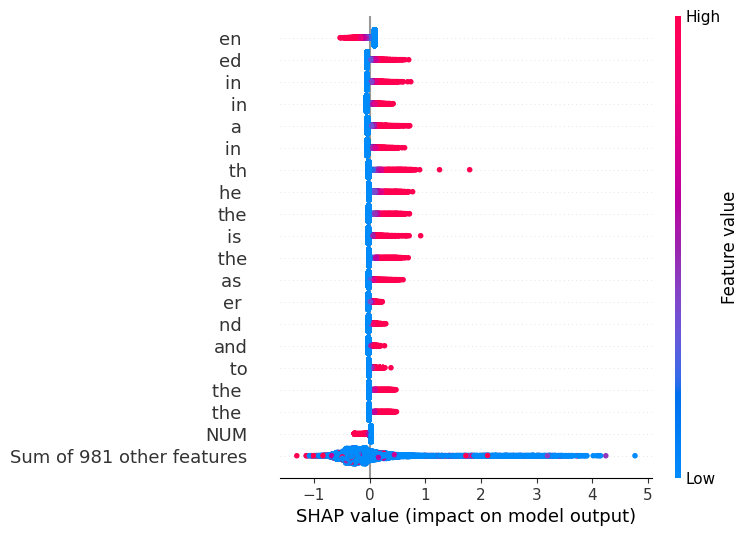

Processing class 18: swe


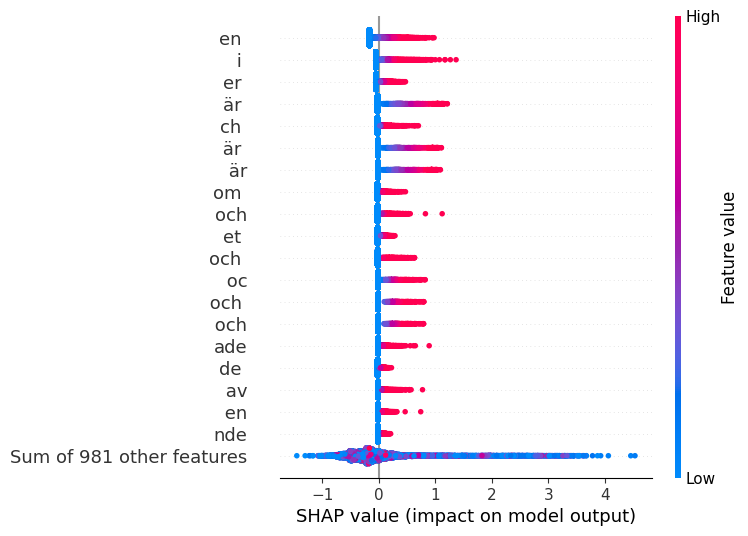

Processing class 14: nno


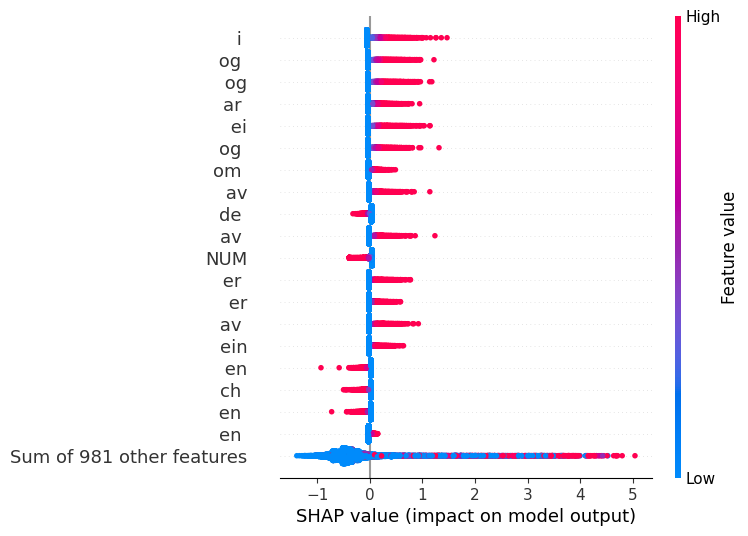

Processing class 8: jpn


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2503 (\N{BENGALI VOWEL SIGN E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2480 (\N{BENGALI LETTER RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


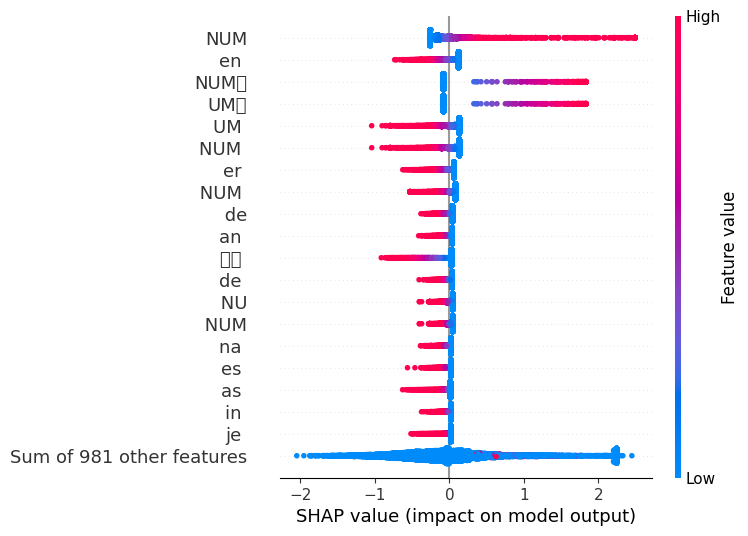

In [ ]:
for label in ['eng', 'swe', 'nno', 'jpn']:
    i = label_encoder.classes_.tolist().index(label)
    print(f"Processing class {i}: {label}")
    # Beeswarm plot
    figsize = (6, 6)
    shap.plots.beeswarm(shap_values[:, :, i], max_display=20, show=True, plot_size=figsize)


---

### 6.1 Ablation Study

Lastly, we want to conduct a small ablation study to investigate how well our model performs under different conditions.

As a first step, choose the two languages for which the classifier worked best.

Next, re-fit the best model six times, each time reducing the **length** of each instance in the training set. To do this, create a custom `TextReducer` class that you can include as a preprocessing step in your pipeline. The class should take a `max_len` argument as a hyperparameter that can be set to train the following models:

- Model 1: `max_len = None` (i.e. no truncation!)
- Model 2: `max_len = 500`
- Model 3: `max_len = 250`
- Model 4: `max_len = 150`
- Model 5: `max_len = 100`
- Model 6: `max_len = 50`

Use average accuracy over the cross validation scores for each model to measure performance for each ablation setting.

🗒❓ How does the reduction of training data affect the performance of the classifier? And what could be some possible reasons for this?

In [ ]:
class TextReducer(BaseEstimator, TransformerMixin):
    """
    Reduces the length of input text to a specified maximum length.
    """
    def __init__(self, max_len):
        self.max_len = max_len

    def fit(self, X, y=None):
        return self

    def _reduce_text(self, text):
        """Reduce text"""
        # print(f'before: {len(text)}')
        if self.max_len is not None and len(text) > self.max_len:
            text = text[:self.max_len]
            # print(f'after: {len(text)}')

        return text

    def transform(self, X, y=None):
        texts = []
        for text in X:
            texts.append(self._reduce_text(text))
        return texts

In [ ]:
# Extract best model form our grid search
best_model = LogisticRegression(
    solver=grid.best_params_['clf__solver'],
    penalty=grid.best_params_['clf__penalty'],
)

In [ ]:
max_lens = [None, 500, 250, 150, 100, 50]
acc_means = []
acc_stds = []
cv = 4

# For-loop to run through the ablation settings
for max_len in max_lens:
    print(f'Running experiment for max_len: {max_len}')
    abl_pipe = Pipeline(steps=[
        ('TextReducer', TextReducer(max_len=max_len)),
        ('normalizer', TextNormalizer()),
        ('vectorizer', TfidfVectorizer(lowercase=False, analyzer='char_wb', ngram_range=(3,6), max_features=1000, smooth_idf=True)),
        ('CLF', best_model)
    ], verbose=True)

    abl_cross_validations = cross_val_score(abl_pipe, x_train, y_train, scoring='accuracy', cv=cv)
    mean_acc = np.mean(abl_cross_validations)
    std_acc = np.std(abl_cross_validations)
    acc_means.append(mean_acc)
    acc_stds.append(std_acc)
    print(f'max_len: {max_len}, avg acc: {mean_acc:.3f}, std: {std_acc:.3f}')

# Put the results into a dataframe
results = pd.DataFrame({'max_len': max_lens, 'acc': acc_means, 'std': acc_stds})
results

Running experiment for max_len: None
[Pipeline] ....... (step 1 of 4) Processing TextReducer, total=   0.0s
[Pipeline] ........ (step 2 of 4) Processing normalizer, total=   0.6s
[Pipeline] ........ (step 3 of 4) Processing vectorizer, total=  13.0s
[Pipeline] ............... (step 4 of 4) Processing CLF, total=   3.5s
[Pipeline] ....... (step 1 of 4) Processing TextReducer, total=   0.0s
[Pipeline] ........ (step 2 of 4) Processing normalizer, total=   0.5s
[Pipeline] ........ (step 3 of 4) Processing vectorizer, total=  13.4s
[Pipeline] ............... (step 4 of 4) Processing CLF, total=   3.7s
[Pipeline] ....... (step 1 of 4) Processing TextReducer, total=   0.0s
[Pipeline] ........ (step 2 of 4) Processing normalizer, total=   1.0s
[Pipeline] ........ (step 3 of 4) Processing vectorizer, total=  14.2s
[Pipeline] ............... (step 4 of 4) Processing CLF, total=   5.3s
[Pipeline] ....... (step 1 of 4) Processing TextReducer, total=   0.0s
[Pipeline] ........ (step 2 of 4) Proces

,max_len,acc,std
0,NaN,0.9670,0.002631
1,500.0,0.9664,0.003262
2,250.0,0.9625,0.001308
3,150.0,0.9507,0.001819
4,100.0,0.9270,0.005696
5,50.0,0.8571,0.000866


<Axes: xlabel='max_len'>

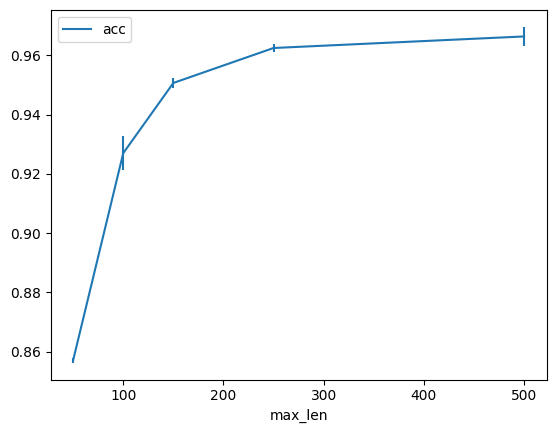

In [ ]:
# Plot 'em
results.plot(x='max_len', y='acc', yerr='std', kind='line')